<a href="https://colab.research.google.com/github/Thalysonsanti/tela-de-login-com-html-e-css/blob/main/An%C3%A1lises_de_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importando as bibliotecas nescessárias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Conectando o banco de dados e criando a tabela

In [ ]:
conexao = sqlite3.connect('dados_vendas.db')
cursor = conexao.cursor()

Criando a tabela de vendas

In [ ]:
cursor.execute("""
CREATE TABLE IF NOT EXISTS vendas1 (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
""")

# Inserindo dados de exemplo
cursor.execute("""
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
('2023-01-05', 'Produto B', 'Roupas', 350.00),
('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
('2023-03-15', 'Produto D', 'Livros', 200.00),
('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
('2023-04-02', 'Produto F', 'Roupas', 400.00),
('2023-05-05', 'Produto G', 'Livros', 150.00),
('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
('2023-07-20', 'Produto I', 'Roupas', 600.00),
('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
('2023-09-30', 'Produto K', 'Livros', 300.00),
('2023-10-05', 'Produto L', 'Roupas', 450.00),
('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
('2023-12-20', 'Produto N', 'Livros', 250.00);
""")

# Confirmando alteração no banco
conexao.commit()

Carregar dados para Pandas

In [ ]:
df_vendas = pd.read_sql('SELECT * FROM vendas1', conexao)


Convetendo data para formato datetime

In [ ]:
df_vendas['data_vendas'] = pd.to_datetime(df_vendas['data_venda'])

print('Primeiras linhas dos dados')
print(df_vendas.head())

Análise os dados

In [ ]:
# 1. Total de vendas no ano
total_vendas = df_vendas["valor_venda"].sum()

# 2. Vendas por categoria
vendas_categoria = df_vendas.groupby("categoria")["valor_venda"].sum()

# 3. Mês com maior volume de vendas
df_vendas["mes"] = df_vendas["data_vendas"].dt.month
vendas_por_mes = df_vendas.groupby("mes")["valor_venda"].sum()
mes_top = vendas_por_mes.idxmax()

print(f"\n Total de vendas: R$ {total_vendas:.2f}")
print("\n Vendas por categoria:")
print(vendas_categoria)
print(f"\n Mês com maior volume de vendas: {mes_top}")


 Total de vendas: R$ 61600.00

 Vendas por categoria:
categoria
Eletrônicos    42700.0
Livros          6300.0
Roupas         12600.0
Name: valor_venda, dtype: float64

 Mês com maior volume de vendas: 1


Visualizaçõ dos dados

/tmp/ipython-input-3586318746.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_categoria.index, y=vendas_categoria.values, palette='viridis')


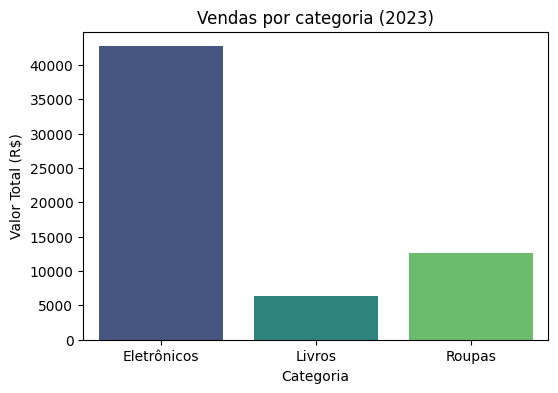

In [ ]:
# vendas por categorias
plt.figure(figsize=(6,4))
sns.barplot(x=vendas_categoria.index, y=vendas_categoria.values, palette='viridis')
plt.title('Vendas por categoria (2023)')
plt.ylabel('Valor Total (R$)')
plt.xlabel('Categoria')
plt.show()

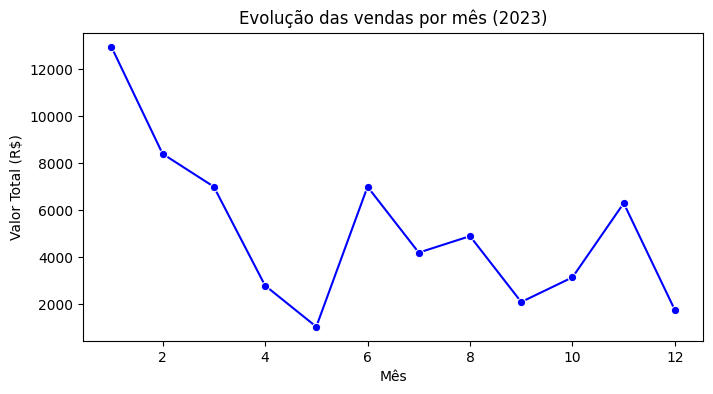

In [ ]:
# Evolução das vendas por mês
plt.figure(figsize=(8,4))
sns.lineplot(x=vendas_por_mes.index, y=vendas_por_mes.values, marker='o', color='blue')
plt.title('Evolução das vendas por mês (2023)')
plt.ylabel('Valor Total (R$)')
plt.xlabel('Mês')
plt.show()

Insights observados:
- Eletrônicos tiveram a maior participação nas vendas.
- O mês com maior volume de vendas foi o mês {mes_top}.
- Roupas e Livros tiveram desempenho menor, mas consistentes ao longo do ano.

Sugestões para a empresa:
1. Investir em campanhas de marketing focadas em Eletrônicos, pois representam o maior faturamento.
2. Criar promoções sazonais em meses de baixa venda para equilibrar o fluxo de receita.
3. Incentivar vendas cruzadas.
exemplo: oferecer livros com desconto em compras de eletrônicos

# Nova seção